Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [17]:
import pandas as pd

df_city_bikes = pd.read_csv('df_city_bike.csv')
df_foursquare = pd.read_csv('df_foursquare_20.csv')
df_yelp = pd.read_csv('df_yelp.csv')

In [18]:
merged_df = df_city_bikes.copy()
merged_df = merged_df.rename(columns={merged_df.columns[0]: 'station_no'})
merged_df.head()

,station_no,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,0,13,"{'installDate': '1278947280000', 'installed': ...",6,7f3020118e56165ed8b2f61899edb971,51.529163,-0.109971,"001023 - River Street , Clerkenwell",2023-07-09T23:01:31.372000Z
1,1,21,"{'installDate': '1278585780000', 'installed': ...",16,67e6c16bce05410ba4b1f0f5000726ea,51.499607,-0.197574,"001018 - Phillimore Gardens, Kensington",2023-07-09T23:01:31.378000Z
2,2,8,"{'installDate': '1278242460000', 'installed': ...",10,26184215d38089fcad213ef222e69780,51.505974,-0.092754,"001024 - Park Street, Bankside",2023-07-09T23:01:31.390000Z
3,3,23,"{'installDate': '1278340440000', 'installed': ...",1,1eabd7ac8e781befd03f52ef56a18aa7,51.523951,-0.122502,"001022 - Brunswick Square, Bloomsbury",2023-07-09T23:01:31.392000Z
4,4,22,"{'installDate': '1278340620000', 'installed': ...",27,23efb32f80a9dcd0e4f61fb44b353ce1,51.521681,-0.130432,"000980 - Malet Street, Bloomsbury",2023-07-09T23:01:31.393000Z


In [19]:
#getting average ratings for parks per station
avg_rating = df_yelp.groupby('row_from_station').agg({'rating': 'mean', 'review_count': 'sum'}).reset_index()
avg_rating.columns = ['row_from_station', 'avg_rating', 'total_review_count']
#merging average ratings and city_bikes dataframe
merged_df = merged_df.merge(avg_rating, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [20]:
# Count the number of rows with the same value in 'row_from_station' and get the corresponding values
count_rows = df_yelp['row_from_station'].value_counts().reset_index()
# Rename the columns for clarity
count_rows.columns = ['row_from_station', 'POI']
merged_df = merged_df.merge(count_rows, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [21]:
df_foursquare_parks = df_foursquare[(df_foursquare['category_id'] >= 16032) & (df_foursquare['category_id'] <= 16039)]
df_foursquare_parks.head()

,row_from_station,fsq_id,category_id,name,latitude,longitude,rating,total_ratings,total_photos,total_tips
20,1,4dca7acb2271a5cb224ba972,16032.0,St Pancras Gardens,51.535381,-0.131405,8.3,10.0,45.0,1.0
28,1,4c114e5d416620a183ded8e4,16032.0,Gasholder Park,51.536847,-0.127765,8.2,50.0,105.0,5.0
44,2,4dd680fd1838b8561cce769e,16039.0,Stepney Green Park,51.517888,-0.046982,8.2,26.0,13.0,3.0
62,3,593ea3a4b2958f0371242d3d,16032.0,Floating Pocket Park,51.518724,-0.171028,7.3,10.0,46.0,1.0
114,5,514b0dc2e4b06366e4b9b2f7,16032.0,Graham Street Park,51.532077,-0.098603,7.7,9.0,14.0,NaN


In [22]:
#getting average ratings for parks per station
avg_rating_fsq = df_foursquare_parks.groupby('row_from_station').agg({'rating': 'mean', 'total_ratings': 'sum'}).reset_index()
avg_rating_fsq.columns = ['row_from_station', 'avg_rating_fsq', 'total_ratings_count_fsq']
#merging average ratings and city_bikes dataframe
merged_df = merged_df.merge(avg_rating_fsq, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [23]:
# Count the number of rows with the same value in 'row_from_station' and get the corresponding values
count_rows_fsq = df_foursquare_parks['row_from_station'].value_counts().reset_index()
# Rename the columns for clarity
count_rows_fsq.columns = ['row_from_station', 'POI_fsq']
merged_df = merged_df.merge(count_rows_fsq, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [24]:
merged_df.to_csv('merged_df.csv', index=False)

In [25]:
merged_df.head()

,station_no,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,avg_rating,total_review_count,POI,avg_rating_fsq,total_ratings_count_fsq,POI_fsq
0,0,13,"{'installDate': '1278947280000', 'installed': ...",6,7f3020118e56165ed8b2f61899edb971,51.529163,-0.109971,"001023 - River Street , Clerkenwell",2023-07-09T23:01:31.372000Z,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21,"{'installDate': '1278585780000', 'installed': ...",16,67e6c16bce05410ba4b1f0f5000726ea,51.499607,-0.197574,"001018 - Phillimore Gardens, Kensington",2023-07-09T23:01:31.378000Z,NaN,NaN,NaN,8.25,60.0,2.0
2,2,8,"{'installDate': '1278242460000', 'installed': ...",10,26184215d38089fcad213ef222e69780,51.505974,-0.092754,"001024 - Park Street, Bankside",2023-07-09T23:01:31.390000Z,NaN,NaN,NaN,8.20,26.0,1.0
3,3,23,"{'installDate': '1278340440000', 'installed': ...",1,1eabd7ac8e781befd03f52ef56a18aa7,51.523951,-0.122502,"001022 - Brunswick Square, Bloomsbury",2023-07-09T23:01:31.392000Z,NaN,NaN,NaN,7.30,10.0,1.0
4,4,22,"{'installDate': '1278340620000', 'installed': ...",27,23efb32f80a9dcd0e4f61fb44b353ce1,51.521681,-0.130432,"000980 - Malet Street, Bloomsbury",2023-07-09T23:01:31.393000Z,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Remove rows with NaN values
merged_df_no_na = merged_df.dropna()
# Remove rows with NaN values from a specific subset of columns from Foursquare
merged_df_no_na_fsq = merged_df.dropna(subset=['avg_rating_fsq', 'total_ratings_count_fsq', 'POI_fsq'])

# Remove rows with NaN values from a specific subset of columns from Yelp
merged_df_no_na_yelp = merged_df.dropna(subset=['avg_rating', 'total_review_count', 'POI'])

print(merged_df_no_na.shape)
print(merged_df_no_na_yelp.shape)
print(merged_df_no_na_fsq.shape)

(0, 15)
(0, 15)
(26, 15)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [27]:
merged_df.describe()

,station_no,empty_slots,free_bikes,latitude,longitude,POI,avg_rating_fsq,total_ratings_count_fsq,POI_fsq
count,797.000000,797.000000,797.000000,797.000000,797.000000,0.0,26.000000,27.000000,27.000000
mean,398.000000,13.698871,12.672522,51.505946,-0.127427,NaN,8.046154,121.370370,1.518519
std,230.218375,9.861333,9.228774,0.020214,0.055133,NaN,0.678811,166.416796,0.752962
min,0.000000,0.000000,0.000000,51.454753,-0.236770,NaN,6.000000,0.000000,1.000000
25%,199.000000,6.000000,5.000000,51.493072,-0.172078,NaN,7.662500,20.500000,1.000000
50%,398.000000,13.000000,11.000000,51.509224,-0.128279,NaN,8.025000,60.000000,1.000000
75%,597.000000,19.000000,19.000000,51.520893,-0.090848,NaN,8.450000,142.000000,2.000000
max,796.000000,55.000000,50.000000,51.549369,-0.002275,NaN,9.400000,757.000000,4.000000


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   station_no               797 non-null    int64  
 1   empty_slots              797 non-null    int64  
 2   extra                    797 non-null    object 
 3   free_bikes               797 non-null    int64  
 4   id                       797 non-null    object 
 5   latitude                 797 non-null    float64
 6   longitude                797 non-null    float64
 7   name                     797 non-null    object 
 8   timestamp                797 non-null    object 
 9   avg_rating               0 non-null      object 
 10  total_review_count       0 non-null      object 
 11  POI                      0 non-null      float64
 12  avg_rating_fsq           26 non-null     float64
 13  total_ratings_count_fsq  27 non-null     float64
 14  POI_fsq                  2

In [14]:
!pip install seaborn

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Goerge\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


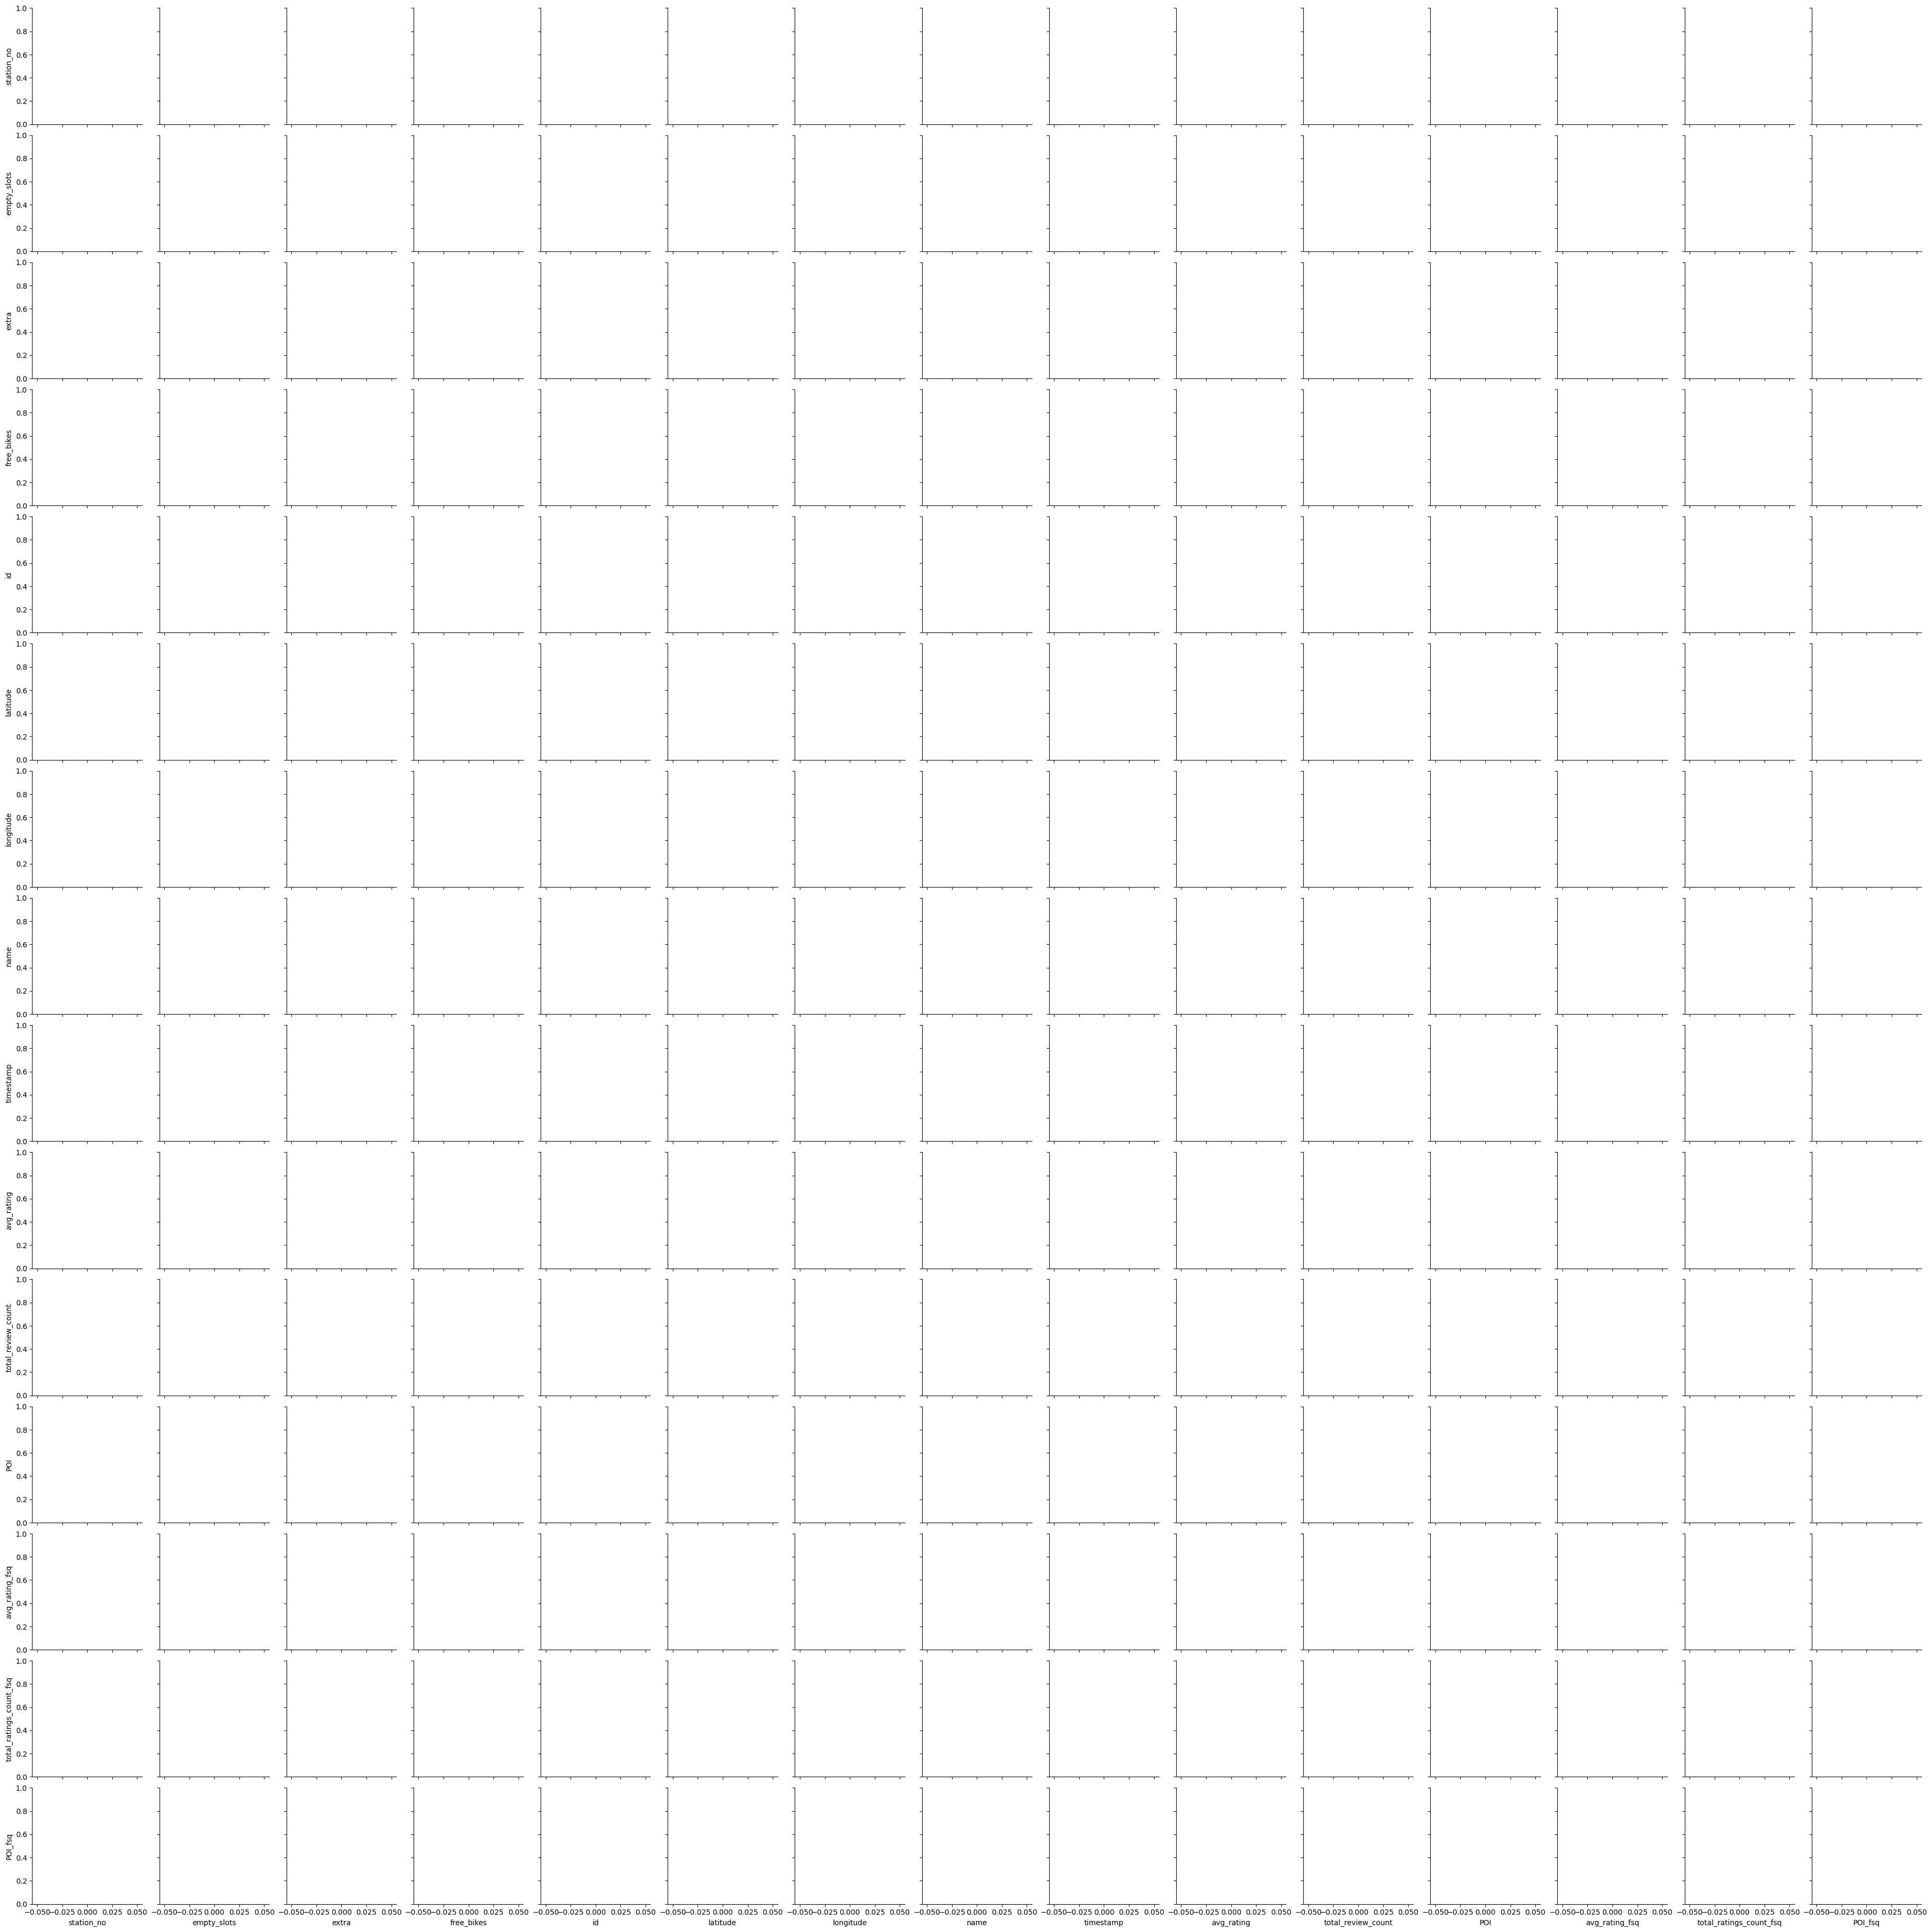

In [30]:
sns.pairplot(merged_df_no_na)
plt.show()

C:\Users\Goerge\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


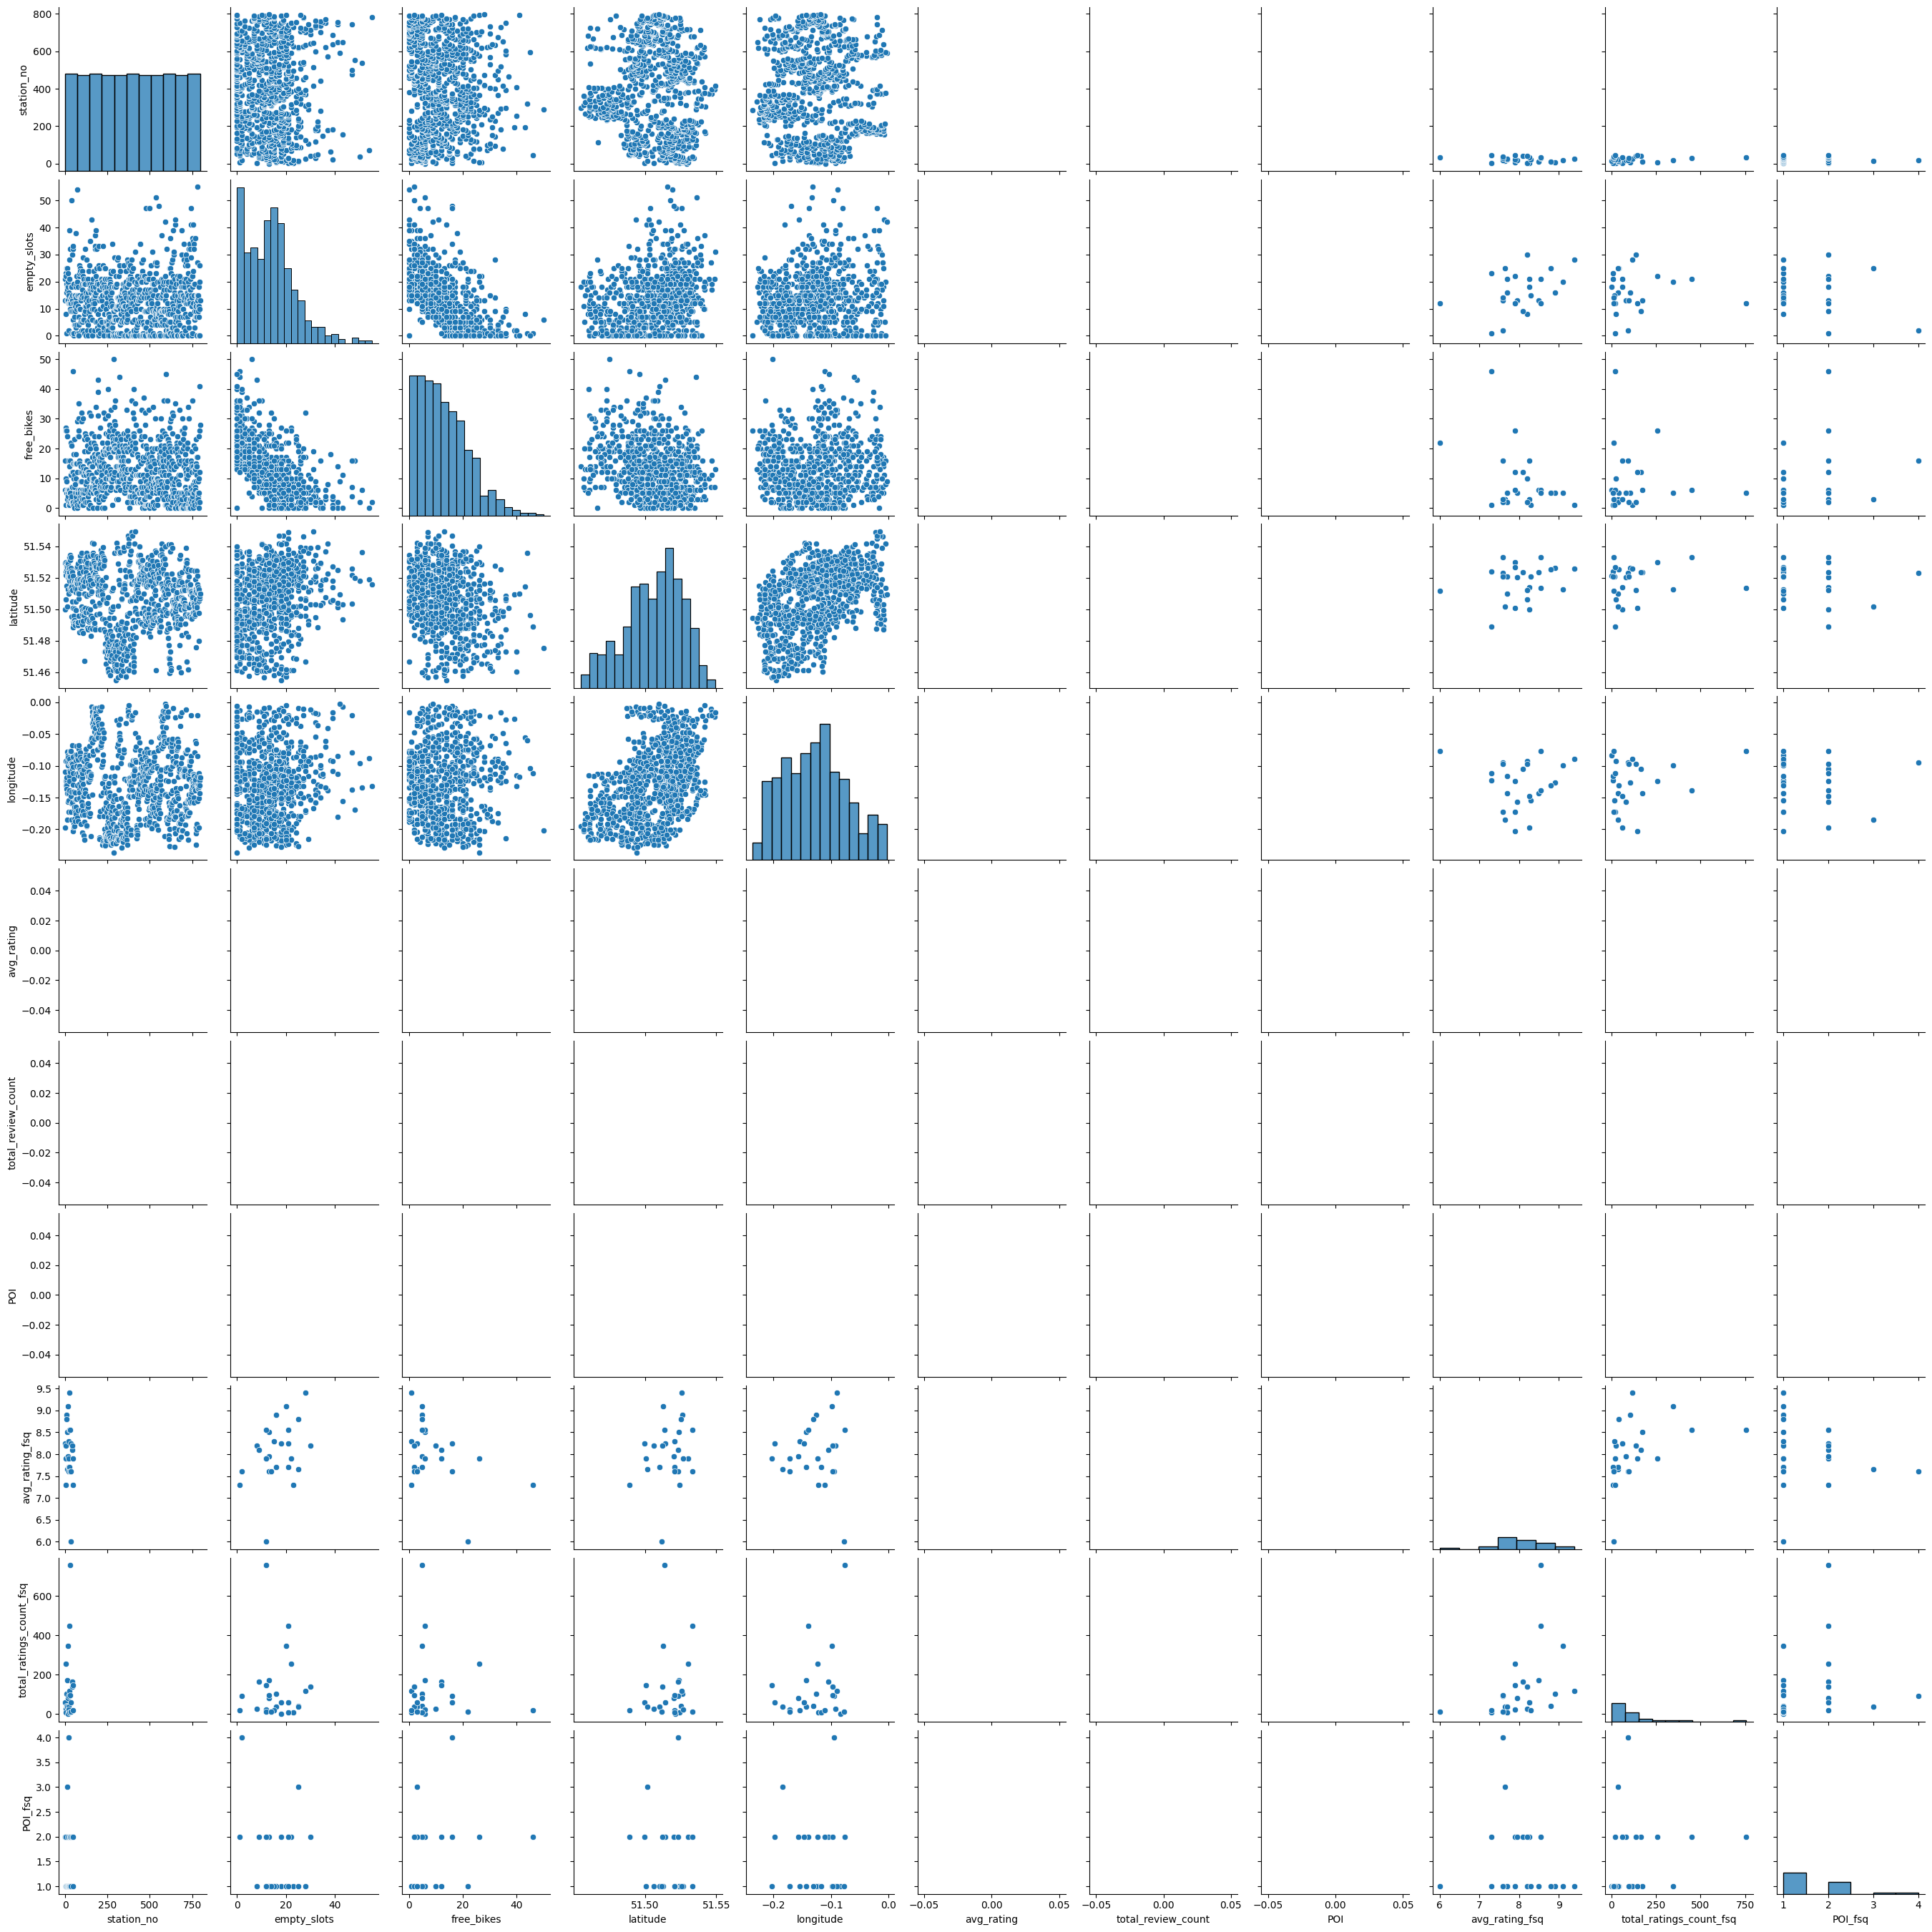

In [33]:
sns.pairplot(merged_df)
plt.show()

In [ ]:
ax = sns.PairGrid(merged_df)
# can manually specify what we want to use for each region

ax.map_upper(sns.histplot)      # put in a seaborn function
ax.map_lower(sns.kdeplot, fill=True)
ax.map_diag(sns.histplot, kde=True)
plt.show()

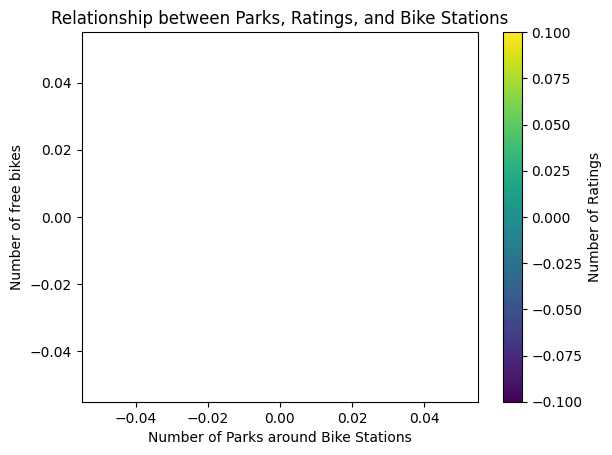

In [32]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(merged_df['POI'], merged_df['free_bikes'], c=merged_df['total_review_count'], cmap='viridis')

# Add labels and title
plt.xlabel('Number of Parks around Bike Stations')
plt.ylabel('Number of free bikes')
plt.title('Relationship between Parks, Ratings, and Bike Stations')

# Add a colorbar to indicate the number of ratings
cbar = plt.colorbar()
cbar.set_label('Number of Ratings')

# Show the plot
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [1]:
from pathlib import Path
Path('bike_stations.db').touch()
import sqlite3
conn = sqlite3.connect('bike_stations.db')
c = conn.cursor()

merged_df.to_sql('bike_stations', conn, if_exists='append', index = False)

NameError: name 'merged_df' is not defined

Look at the data before and after the join to validate your data.

In [2]:
with sqlite3.connect('bike_stations.db') as conn:
    df = pd.read_sql("select * from bike_stations", conn)
    print(df)

NameError: name 'pd' is not defined